In [7]:
import handcalcs.render
import math as mt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statistics as st

Correção

Equinócio de outono - 21/mar

In [8]:
Mes=6     #Junho
Dia=21     #dia da semana
Cor=1    #corre
L_O=-45       #Longitude Hora Legal
L =-46.6388  #Longitude 
L_a= -23.5489  #Latitude

numero de dias do ano 

In [23]:
n= Dia + (Mes -1)*30 +Cor
n

172

HORA SOLAR 

In [10]:
B= (360/364)*(n-81)
B

90.0

In [24]:
E= 9.87*np.sin(np.radians(2*B))-7.53*np.cos(np.radians(B))-1.5*np.sin(np.radians(B))

E

-1.4999999999999993

In [12]:

Corhora= (4*(L_O-L)+E)/60


In [13]:
df=pd.read_csv("Hora Legal.csv" , encoding ='UTF-8' , sep=";")



In [14]:

df['HS']= df['HL']+Corhora


ANGULO HORARIO 

In [15]:

df['Omega']= (df['HS']-12)*15


DECLINAÇÃO SOLAR 

In [25]:

sigma= 23.45*np.sin(np.radians(360/365*(284+n)))
sigma

23.449782846813658

ANGULO ZENITAL

In [26]:

df['teta_z']= np.degrees(np.arccos(np.sin(np.radians(sigma))*np.sin(np.radians(L_a))+np.cos(np.radians(sigma))*np.cos(np.radians(L_a))*np.cos(np.radians(df['Omega']))))



In [27]:
df['Sombra']=np.tan(np.radians(df['teta_z']))
df


,HL,HS,Omega,teta_z,Sombra
0,5.00,5.084253,-103.7362,111.019789,-2.602402
1,5.50,5.584253,-96.2362,104.498111,-3.867239
2,5.99,6.074253,-88.8862,98.200870,-6.938773
3,6.50,6.584253,-81.2362,91.768122,-32.394587
4,7.00,7.084253,-73.7362,85.610235,13.026582
5,7.50,7.584253,-66.2362,79.635689,5.467751
6,8.00,8.084253,-58.7362,73.890536,3.462435
7,8.50,8.584253,-51.2362,68.434033,2.530101
8,9.00,9.084253,-43.7362,63.342165,1.991929
9,9.50,9.584253,-36.2362,58.711103,1.645429


In [28]:
sombra=df.loc[4:24]
sombra


,HL,HS,Omega,teta_z,Sombra
4,7.0,7.084253,-73.7362,85.610235,13.026582
5,7.5,7.584253,-66.2362,79.635689,5.467751
6,8.0,8.084253,-58.7362,73.890536,3.462435
7,8.5,8.584253,-51.2362,68.434033,2.530101
8,9.0,9.084253,-43.7362,63.342165,1.991929
9,9.5,9.584253,-36.2362,58.711103,1.645429
10,10.0,10.084253,-28.7362,54.659179,1.410219
11,10.5,10.584253,-21.2362,51.324659,1.249306
12,11.0,11.084253,-13.7362,48.855389,1.144521
13,11.5,11.584253,-6.2362,47.387345,1.087010


<AxesSubplot:xlabel='HL'>

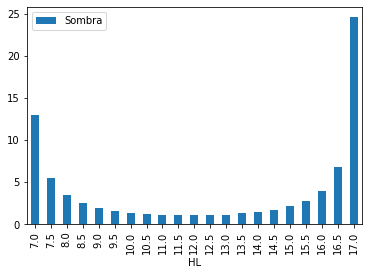

In [29]:
sombra.plot.bar(y='Sombra',x='HL')

ANGULO DO AZIMUTE SOLAR

df['Gama_s']= np.degrees(np.arccos(np.radians(((np.cos(np.radians(df['teta_z'])))* (np.sin(np.radians(df['Omega'])))-(np.sin(np.radians(df['sigma']))))/((np.sin(np.radians(df['teta_z'])))*np.cos(np.radians(df['teta_z']))))))


ANGULO DE INCIDÊNCIA 

df['teta']=(np.sin(np.radians(df['sigma'])))*(np.sin(np.radians(L_a)))
